In [1]:
%load_ext autoreload

In [12]:
%autoreload
import pathlib
import matplotlib.pyplot as plt
import pke
import networkx as nx
import pandas as pd

In [3]:
sample_text_path = pathlib.Path('sample.txt')
assert sample_text_path.exists()
with open(sample_text_path) as f:
    print(f.read())

Compatibility of systems of linear constraints over the set of natural numbers.
Criteria of compatibility of a system of linear Diophantine equations, strict
inequations, and nonstrict inequations are considered. Upper bounds for
components of a minimal set of solutions and algorithms of construction of
minimal generating sets of solutions for all types of systems are given.
These criteria and the corresponding algorithms for constructing a minimal
supporting set of solutions can be used in solving all the considered types
systems and systems of mixed types.


In [14]:
# define the set of valid Part-of-Speeches
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a SingleRank extractor.
extractor = pke.unsupervised.SingleRank()

# 2. load the content of the document.
extractor.load_document(input=str(sample_text_path),
                        language='en',
                        normalization=None)

# 3. select the longest sequences of nouns and adjectives as candidates.
extractor.candidate_selection(pos=pos)

# 4. weight the candidates using the sum of their word's scores that are
#    computed using random walk. In the graph, nodes are words of
#    certain part-of-speech (nouns and adjectives) that are connected if
#    they occur in a window of 10 words.
extractor.candidate_weighting(window=2,
                              pos=pos)

# 5. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

In [15]:
keyphrases

[('linear diophantine equations', 0.21259042534801156),
 ('mixed types', 0.1289430193731221),
 ('minimal set', 0.1289424893731221),
 ('upper bounds', 0.12894241937312212),
 ('nonstrict inequations', 0.12894236937312212),
 ('natural numbers', 0.1289421693731221),
 ('linear constraints', 0.12894210937312212),
 ('types', 0.06447162468656105),
 ('minimal', 0.06447155468656106),
 ('inequations', 0.06447130468656105)]

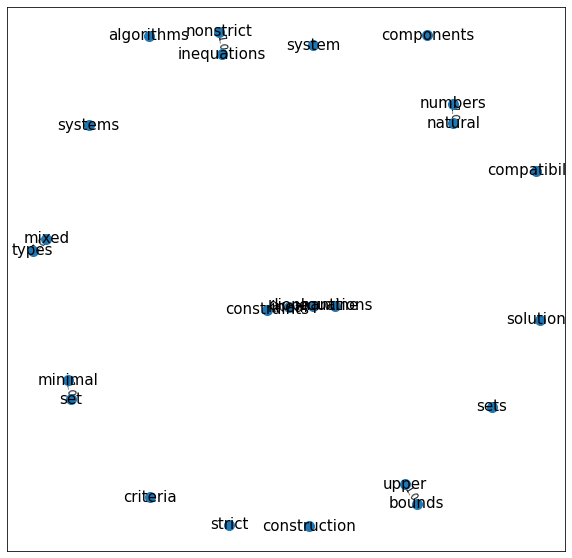

In [16]:
plt.figure(figsize=(10, 10))
G = extractor.graph
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

# labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif");
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [17]:
pd.DataFrame(nx.to_numpy_array(extractor.graph))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
